In [1]:
import numpy as np
from os.path import join
import pandas as pd
from skimage.measure import regionprops_table
import matplotlib.pyplot as plt
from utils.nucStitch import fullNucImage16

In [23]:
segmentationPath = "/Volumes/Aortas/Aorta/segmentations/inducedRainbow/old/red/5-60/aorta08/cellposeSegm_RedP5-60_aorta08_50Thres_final_seg.npy"
nucleiPath = "/Volumes/Aortas/Aorta/segmentations/inducedRainbow/final/nuclei/5-60/aorta08"

In [24]:
df = pd.DataFrame()
nuclei = np.load(join(nucleiPath, "Cropped_IMG-1_seg.npy"), allow_pickle=True).item()['masks']
yLength = nuclei.shape[0]
xLength = nuclei.shape[1]
for i in range(16):
    number = i+1
    nuclei = np.load(join(nucleiPath, "Cropped_IMG-" + str(number) + '_seg.npy'), allow_pickle=True).item()['masks']
    row = int(i/4) + 1
    column  = (i%4) + 1
    prop_dict = regionprops_table(nuclei, properties = ('label', 'centroid'))
    df_help = pd.DataFrame(prop_dict)
    df_help['picture_id'] = number
    df_help['yCoord'] = df_help['centroid-0']*row
    df_help['xCoord'] = df_help['centroid-1']*column
    #df = df.append(df_help, ignore_index=True)
    df = pd.concat([df, df_help], axis=0)

nucImage = fullNucImage16(nucleiPath)

In [26]:
masks = np.load(segmentationPath, allow_pickle=True).item()['masks']

In [27]:
accuracy_value = 0.8
clusters = list()
dic = {}
dicNot = list()
for mask in np.unique(masks):
    if mask != 0:
        cluster = list()
        coord = np.where(masks == mask)
        segmentationNuc = np.unique(nucImage[coord])
        for j in segmentationNuc:
            if j != 0:
                #occurence of nucleus pixel in
                nucOccur = np.bincount(nucImage[coord])[j]
                #How many pixels does this nucleus have:
                coordLen = len(np.where(nucImage == j)[0])
                #check if most of nuclei values are in segmentation
                if(nucOccur >= accuracy_value*coordLen):
                    cluster.append(j)
        if cluster:
            dic[mask] = cluster
            clusters.append(cluster)
        else:
            dicNot.append(mask)

In [28]:
clusterSizes = []
for key in dic:
    clusterSizes.append(len(dic[key]))

In [29]:
np.max(clusterSizes)

11

In [36]:
resultdic = {"age": segmentationPath.split("/")[-3], "aorta": segmentationPath.split("/")[-2]}
unique, counts = np.unique(clusterSizes, return_counts=True)
for i in range(1,18):
    if i in unique:
        resultdic[i] = counts[np.where(unique==i)][0]
    else:
        resultdic[i] = 0

In [37]:
dfHelp = pd.DataFrame(resultdic, index = [0])

In [38]:
dfHelp

,age,aorta,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5-60,aorta08,226,125,35,16,7,4,1,0,1,0,1,0,0,0,0,0,0


In [33]:
dfHelp[1] = dfHelp[1][0] + len(dicNot)

In [34]:
dfHelp

,age,aorta,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5-60,aorta08,337,125,35,16,7,4,1,0,1,0,1,0,0,0,0,0,0


In [39]:
dfResult = pd.concat([dfResult, dfHelp])
dfResult

,age,aorta,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5-60,aorta07,147,73,15,7,2,1,0,1,1,0,0,0,0,0,0,0,0
0,5-60,aorta08,226,125,35,16,7,4,1,0,1,0,1,0,0,0,0,0,0


In [40]:
dfResult.to_csv("/Volumes/Aortas/Aorta/results/inducedRainbow/clusterSizes/5-60/red/clusterSizeRedP5-60_redCellposeA7-8.csv")

In [21]:
dfResult = pd.DataFrame()

In [35]:
len(dicNot)

111

In [20]:
i = 1
if i in unique:
    print("yes")

yes


In [26]:
counts[np.where(unique==i)][0]

313

In [11]:
segmentationPath.split("/")[-3]

'0-5'

(array([313.,  87.,  27.,  13.,   8.,   3.,   2.,   0.,   0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <BarContainer object of 9 artists>)

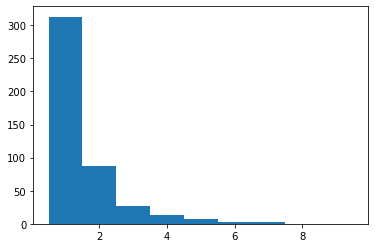

In [56]:
plt.hist(clusterSizes, bins = [0.5, 1.5, 2.5, 3.5,4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [58]:
dfResult = pd.DataFrame({"aorta01": clusterSizes})
dfResult.to_csv(savePath)